# statistical machine learning models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn import metrics, naive_bayes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split




In [ ]:
Cardio = pd.read_csv("CSV-Heart Disease.csv")

In [ ]:
Cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
duplicate_rows = Cardio[Cardio.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [ ]:
Df = Cardio

In [ ]:
Df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
Df.drop("id", inplace=True, axis=1)

In [ ]:
Df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,6222396944457,2,28224,7.874008,110,80,1,1,0,0,1,0
1,8276730892352,1,24336,9.219544,140,90,3,1,0,0,1,1
2,6705293668793,1,27225,8.000000,130,70,3,1,0,0,0,1
3,5473177383367,2,28561,9.055385,150,100,1,1,0,0,1,1
4,5335522972424,1,24336,7.483315,100,60,1,1,0,0,0,0


In [ ]:
#get the duplicate rows
duplicate_rows = Df[Df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80            1     1      0   
52552  21943       1    

In [ ]:
duplicate_rows = Df[Df.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

print("Number of Duplicate Rows:", num_duplicate_rows)

Number of Duplicate Rows: 24


In [ ]:
Df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


VIF

In [ ]:


# Assuming Df contains the features for which VIF needs to be calculated

# Add a constant term to the features
X_with_const = sm.add_constant(Df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["features"] = Df.columns
vif_data["VIF Factor"] = [sm.OLS(X_with_const[col], X_with_const.drop(columns=[col])).fit().rsquared for col in Df.columns]

print(vif_data)

       features  VIF Factor
0           age    0.076996
1        gender    0.314506
2        height    0.306579
3        weight    0.138269
4         ap_hi    0.003716
5         ap_lo    0.005815
6   cholesterol    0.251219
7          gluc    0.207477
8         smoke    0.198446
9          alco    0.122288
10       active    0.003019
11       cardio    0.120162


In [ ]:
# Create the correlation matrix
correlation_matrix = Df.corr()

# Print or do whatever you need with the correlation matrix
print(correlation_matrix)

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.018474 -0.082870  0.053889  0.020274  0.016533   
gender      -0.018474  1.000000  0.510089  0.160847  0.005996  0.015241   
height      -0.082870  0.510089  1.000000  0.310054  0.005603  0.006554   
weight       0.053889  0.160847  0.310054  1.000000  0.031106  0.043058   
ap_hi        0.020274  0.005996  0.005603  0.031106  1.000000  0.016084   
ap_lo        0.016533  0.015241  0.006554  0.043058  0.016084  1.000000   
cholesterol  0.154703 -0.035915 -0.050549  0.140525  0.023768  0.024004   
gluc         0.098205 -0.020558 -0.019059  0.105537  0.011833  0.010794   
smoke       -0.047275  0.338131  0.192376  0.068446 -0.000928  0.005177   
alco        -0.029882  0.170950  0.096877  0.067439  0.001403  0.010594   
active      -0.010702  0.005917 -0.007209 -0.017225 -0.000031  0.004784   
cardio       0.237682  0.008037 -0.010645  0.183646  0.054475  0.065717   

             cholesterol

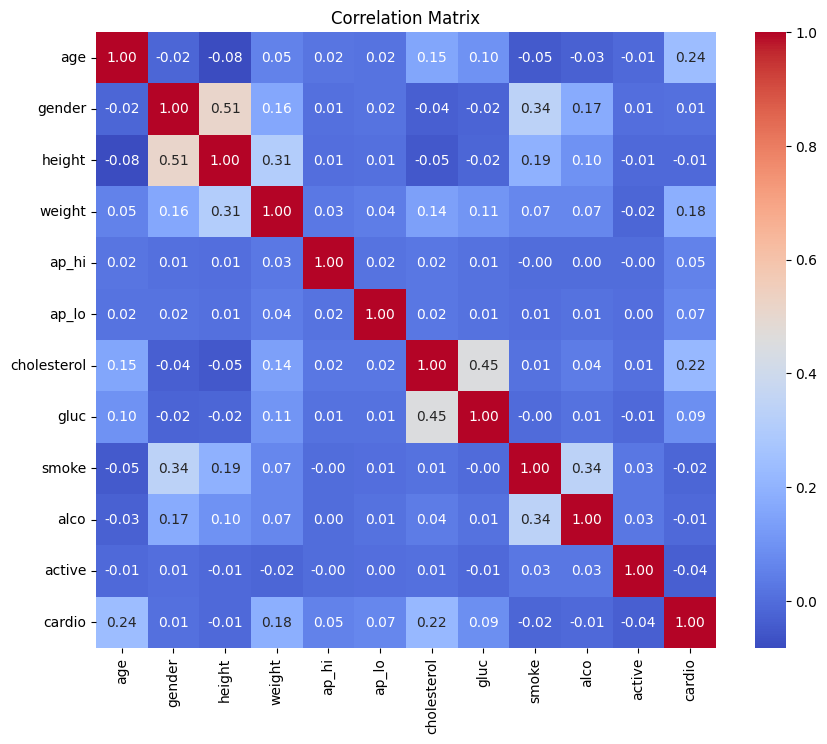

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Histogram of Age')

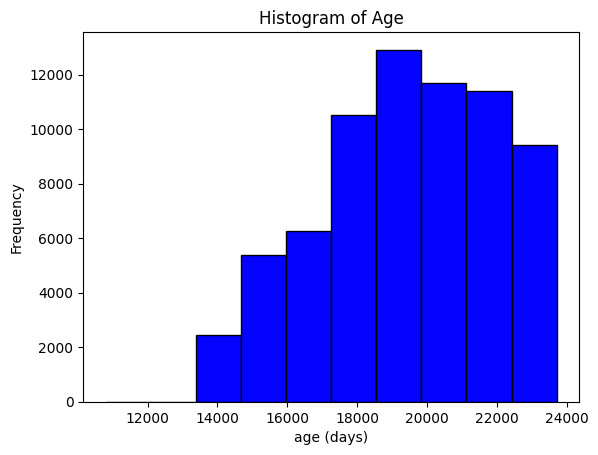

In [ ]:
#Histogram Age

# plot histogram
plt.hist(Df['age'], bins=10, alpha=0.99, color='blue', edgecolor='black')
plt.xlabel('age (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Gender')

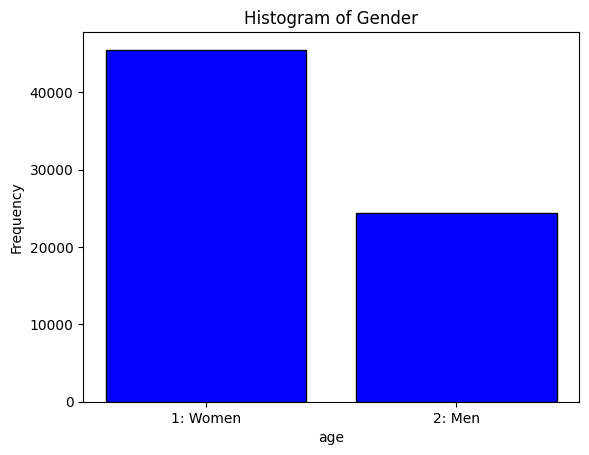

In [ ]:
#Histogram Gender

# plot histogram
plt.hist(Df['gender'], bins=[0.5, 1.5, 2.5], alpha=0.99, color='blue', edgecolor='black', rwidth=0.8)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2], labels=['1: Women', '2: Men'])
plt.title('Histogram of Gender')

Text(0.5, 1.0, 'Histogram of Height')

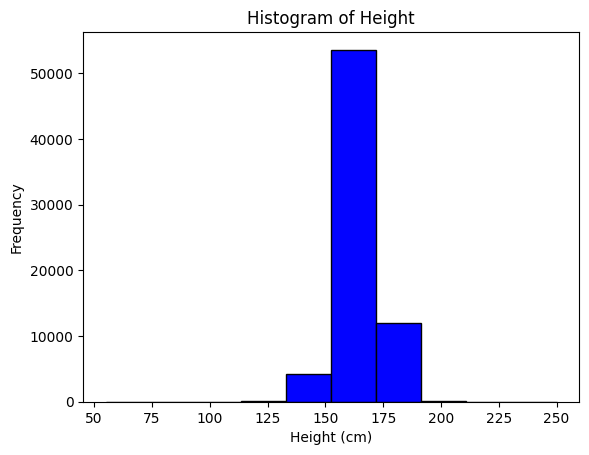

In [ ]:
#Histogram Height

# plot histogram
plt.hist(Df['height'], bins=10, alpha=0.99, color='blue', edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Height')

Text(0.5, 1.0, 'Histogram of weight')

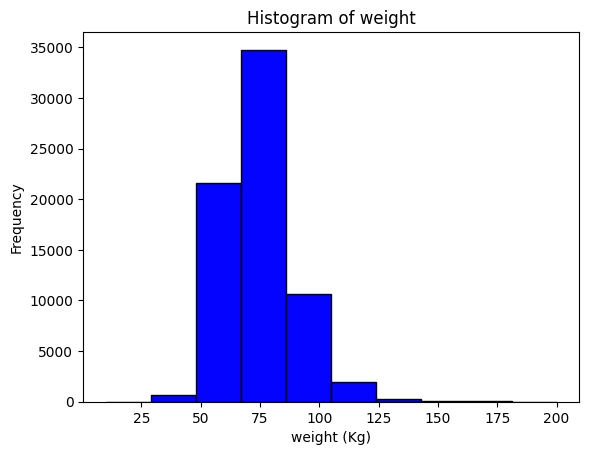

In [ ]:
#Histogram Weight

plt.hist(Df['weight'], bins=10, alpha=0.99, color='blue', edgecolor='black')
plt.xlabel('weight (Kg)')
plt.ylabel('Frequency')
plt.title('Histogram of weight')

Text(0.5, 1.0, 'Histogram of Systolic blood pressure')

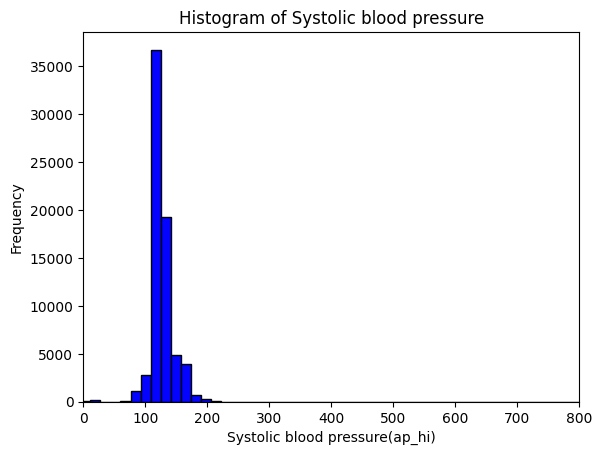

In [ ]:
#Histogram ap_hi ---- Systolic blood pressure

plt.hist(Df['ap_hi'], bins=1000, alpha=0.99, color='blue', edgecolor='black')
plt.xlabel('Systolic blood pressure(ap_hi)')
plt.ylabel('Frequency')
plt.xlim(0,800)
plt.title('Histogram of Systolic blood pressure')



Text(0.5, 1.0, 'Histogram of Diastolic blood pressure')

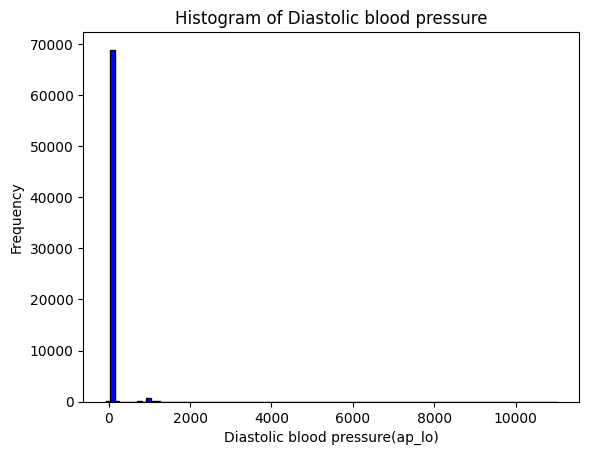

In [ ]:
# Histogram ap_lo
plt.hist(Df['ap_lo'], bins=100, alpha=0.99, color='blue', edgecolor='black')
plt.xlabel('Diastolic blood pressure(ap_lo)')
plt.ylabel('Frequency')
# plt.xlim(0,800)
plt.title('Histogram of Diastolic blood pressure')

Text(0.5, 1.0, 'Histogram of cholesterol')

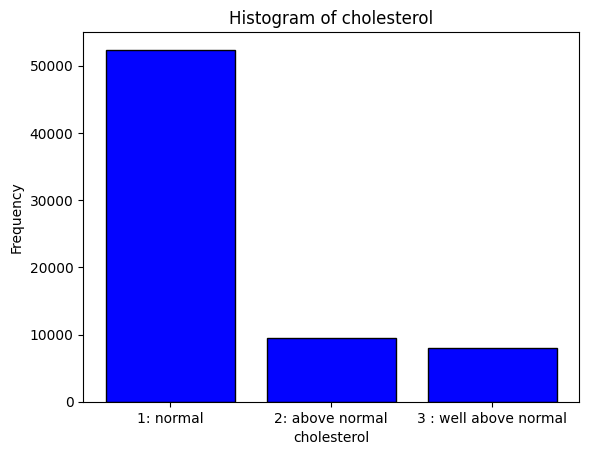

In [ ]:
# Histogram cholesterol
plt.hist(Df['cholesterol'], bins=[0.5, 1.5, 2.5, 3.5], alpha=0.99, color='blue', edgecolor='black', rwidth=0.8)
plt.xlabel('cholesterol')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3], labels=['1: normal', '2: above normal', '3 : well above normal'] )
plt.title('Histogram of cholesterol')

Text(0.5, 1.0, 'Histogram of Glucose')

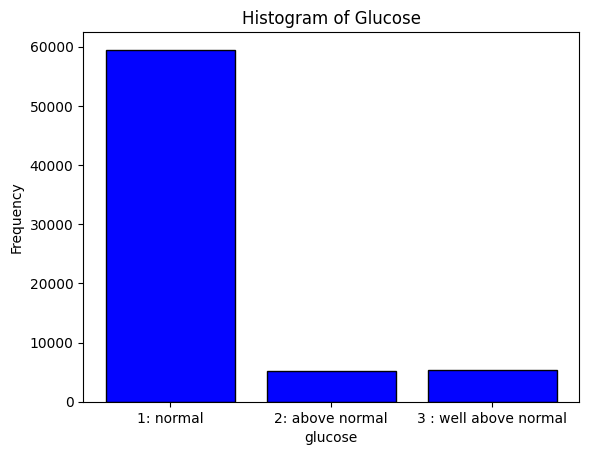

In [ ]:

# Histogram gluc
plt.hist(Df['gluc'], bins=[0.5, 1.5, 2.5, 3.5], alpha=0.99, color='blue', edgecolor='black', rwidth=0.8)
plt.xlabel('glucose')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3], labels=['1: normal', '2: above normal', '3 : well above normal'] )
plt.title('Histogram of Glucose')

Text(0.5, 1.0, 'Histogram of Smoke')

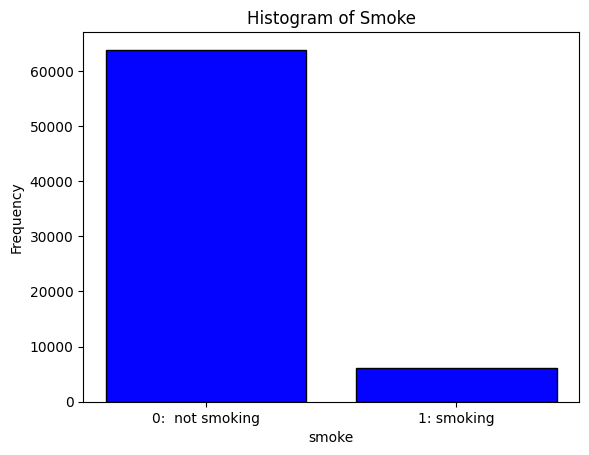

In [ ]:
# Histogram smoke
plt.hist(Df['smoke'], bins=[0, 1, 2 ], alpha=0.99, color='blue', edgecolor='black', rwidth=0.8)
plt.xlabel('smoke')
plt.ylabel('Frequency')
plt.xticks(ticks=[0.5,   1.5], labels=['0:  not smoking', '1: smoking'] )
plt.title('Histogram of Smoke')

Text(0.5, 1.0, 'Histogram of Alcohol')

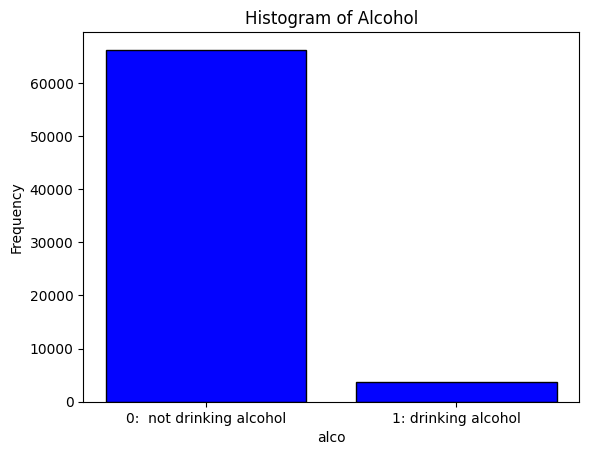

In [ ]:

# Histogram Alco
plt.hist(Df['alco'], bins=[0, 1, 2 ], alpha=0.99, color='blue', edgecolor='black', rwidth=0.8)
plt.xlabel('alco')
plt.ylabel('Frequency')
plt.xticks(ticks=[0.5,   1.5], labels=['0:  not drinking alcohol', '1: drinking alcohol'] )
plt.title('Histogram of Alcohol')

Text(0.5, 1.0, 'Histogram of Active')

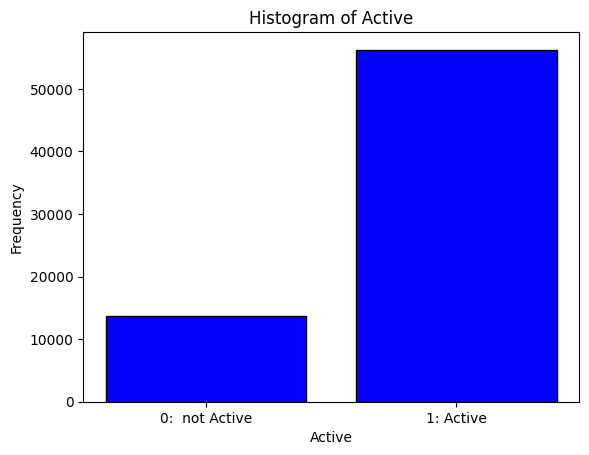

In [ ]:
# Histogram Active
plt.hist(Df['active'], bins=[0, 1, 2 ], alpha=0.99, color='blue', edgecolor='black', rwidth=0.8)
plt.xlabel('Active')
plt.ylabel('Frequency')
plt.xticks(ticks=[0.5,   1.5], labels=['0:  not Active', '1: Active'] )
plt.title('Histogram of Active')

Text(0.5, 1.0, 'Histogram of Cardio Vascular Disease')

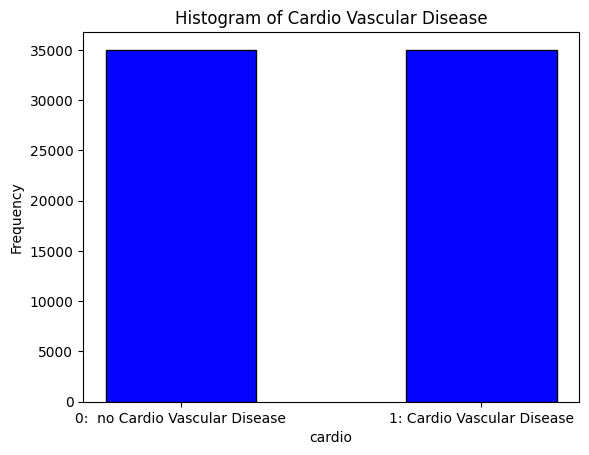

In [ ]:
# Histogram cardio
plt.hist(Df['cardio'], bins=[0, 1, 2 ], alpha=0.99, color='blue', edgecolor='black', rwidth=0.5)
plt.xlabel('cardio')
plt.ylabel('Frequency')
plt.xticks(ticks=[0.5,   1.5], labels=['0:  no Cardio Vascular Disease', '1: Cardio Vascular Disease'] )
plt.title('Histogram of Cardio Vascular Disease')

In [ ]:
duplicate_rows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [ ]:
Df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Remove Duplicate**

In [ ]:
Df_cleaned = Df.drop_duplicates()

In [ ]:
print("New number of rows after dropping duplicates:", Df_cleaned.shape[0])

New number of rows after dropping duplicates: 69976


In [ ]:
Df = Df_cleaned

In [ ]:
print("New number of rows after dropping duplicates:", Df.shape[0])

New number of rows after dropping duplicates: 69976


# **Transformation**

The histogram of variables shows that weight, Systolic blood pressure, and Diastolic blood pressure are positively skewed. And height and age are negatively skewed


In [ ]:
Df['weight'] = np.sqrt(Df['weight'])


<ipython-input-56-42a14ba8192f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['weight'] = np.sqrt(Df['weight'])


In [ ]:
Df['height'] = Df['height']**2


<ipython-input-57-7bd57ef26629>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['height'] = Df['height']**2


In [ ]:
Df['age'] = Df['age']**3

<ipython-input-58-68b179e70450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['age'] = Df['age']**3


In [ ]:
Df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,6222396944457,2,28224,7.874008,110,80,1,1,0,0,1,0
1,1,8276730892352,1,24336,9.219544,140,90,3,1,0,0,1,1
2,2,6705293668793,1,27225,8.000000,130,70,3,1,0,0,0,1
3,3,5473177383367,2,28561,9.055385,150,100,1,1,0,0,1,1
4,4,5335522972424,1,24336,7.483315,100,60,1,1,0,0,0,0
5,8,10523615499944,1,22801,8.185353,120,80,2,2,0,0,0,0
6,9,10812920196897,1,24649,9.643651,130,80,3,1,0,0,1,0
7,12,11518676872704,2,31684,9.746794,130,90,3,3,0,0,1,1
8,13,5515211501632,1,24964,8.426150,110,70,1,1,0,0,1,0
9,14,7802448785704,1,26896,8.246211,110,60,1,1,0,0,0,0


# **Histogram**

Text(0.5, 1.0, 'Histogram of weight')

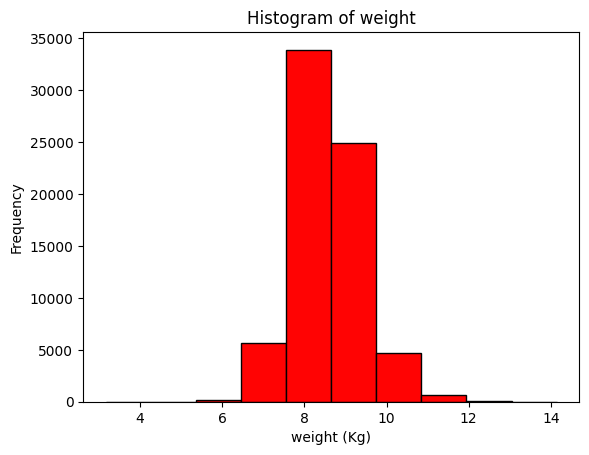

In [ ]:
#Histogram Weight

plt.hist(Df['weight'], bins=10, alpha=0.99, color='red', edgecolor='black')
plt.xlabel('weight (Kg)')
plt.ylabel('Frequency')
# min_value = 1.7  # Specify the minimum value of the x-axis
# max_value = 2.4  # Specify the maximum value of the x-axis
# plt.xlim(min_value, max_value)
plt.title('Histogram of weight')

Text(0.5, 1.0, 'Histogram of Height')

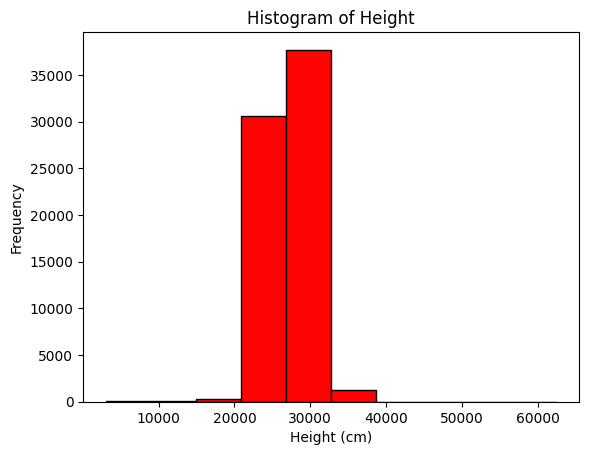

In [ ]:
#Histogram Height

# plot histogram
plt.hist(Df['height'], bins=10, alpha=0.99, color='red', edgecolor='black')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Height')

Text(0.5, 1.0, 'Histogram of Age')

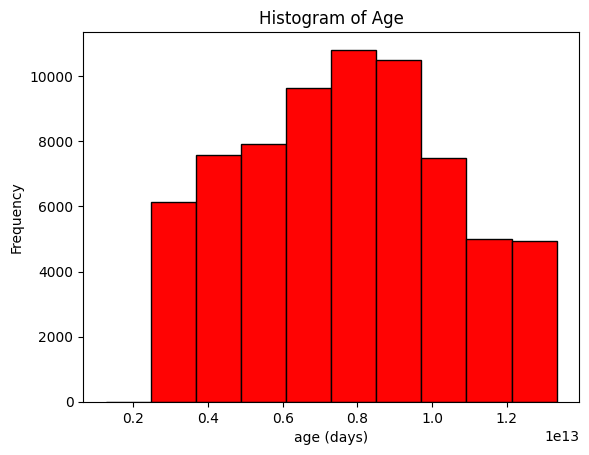

In [ ]:
#Histogram Age

# plot histogram
plt.hist(Df['age'], bins=10, alpha=0.99, color='red', edgecolor='black')
plt.xlabel('age (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# **Normalize**

In [ ]:
# Selecting the columns to normalize
columns_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo' ,'gender', 'cholesterol','gluc' , 'smoke', 'alco', 'active']

In [ ]:
Df_Normalized = Df.copy()

In [ ]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Display the first few rows of the DataFrame after normalization
#Df[columns_to_normalize] = scaler.fit_transform(Df[columns_to_normalize])
Df_Normalized.loc[:, columns_to_normalize] = scaler.fit_transform(Df_Normalized[columns_to_normalize])

<ipython-input-62-069b5699c448>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Df_Normalized.loc[:, columns_to_normalize] = scaler.fit_transform(Df_Normalized[columns_to_normalize])


In [ ]:
Df_Normalized.head(100)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.411048,1.0,0.423691,0.429125,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0
1,0.581180,0.0,0.358319,0.551671,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,1
2,0.451039,0.0,0.406894,0.440600,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,1
3,0.349000,1.0,0.429357,0.536720,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,1
4,0.337600,0.0,0.358319,0.393542,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.671050,0.0,0.368878,0.375035,0.016079,0.012647,0.0,0.0,0.0,0.0,1.0,0
96,0.487224,1.0,0.406894,0.446270,0.016079,0.012647,0.0,0.0,0.0,0.0,1.0,0
97,0.412478,0.0,0.406894,0.618186,0.018553,0.016260,0.0,0.0,0.0,0.0,0.0,1
98,0.760831,1.0,0.435057,0.622751,0.016698,0.013550,0.0,0.0,0.0,0.0,0.0,1


# **Data Partitioning**

In [ ]:
# Randomly split  data into train, validation, and test sets

X = Df_Normalized.drop('cardio', axis=1)  # Features
y = Df_Normalized['cardio']  # Target variable

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# #train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# # test is now 10% of the initial data set
# # validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_val: {X_val.shape},\n X_test: {X_test.shape}")

Shape of partitions:
 X_train: (52482, 11), 
 X_val: (10496, 11),
 X_test: (6998, 11)


Modelling

# **`Logistic Regression`**

In [ ]:
# create linear regression object
logistic_reg = linear_model.LogisticRegression(max_iter = 1000)
# fit the linear regression model to your training data
logistic_reg.fit(X_train, y_train)
print(f"intercept:{logistic_reg.intercept_}\n")
print(f"Estiamted coefficients:{logistic_reg.coef_}")

intercept:[-2.8390015]

Estiamted coefficients:[[ 1.93095444  0.07342514 -2.07503024  4.79550349  6.79248494  7.94178359
   1.23335233 -0.25911067 -0.13425503 -0.13653923 -0.18797379]]


**Performance Metrics:**

In [ ]:
y_pred_Logit = logistic_reg.predict(X_val)
print(y_pred_Logit)
probalilities = logistic_reg.predict_proba(X_val)
print(f"Estiamted Probabilities:{probalilities}")

[0 0 0 ... 1 1 1]
Estiamted Probabilities:[[0.63620759 0.36379241]
 [0.54257591 0.45742409]
 [0.5246542  0.4753458 ]
 ...
 [0.42081949 0.57918051]
 [0.37475546 0.62524454]
 [0.38155265 0.61844735]]


In [ ]:
acc = metrics.accuracy_score(y_val, y_pred_Logit)
print(f"Accuracy: {acc}\n")

auc = metrics.roc_auc_score(y_val, probalilities[:, 1]) # probability of the class with the greater label
print(f"Area Under ROC curve (AUC): {auc}\n")

confusion_mat_Logit = metrics.confusion_matrix(y_val, y_pred_Logit)
confusion_mat_Logit

Accuracy: 0.6449123475609756

Area Under ROC curve (AUC): 0.7016083148680339



array([[3600, 1706],
       [2021, 3169]])

In [ ]:
tn, fp, fn, tp = confusion_mat_Logit.ravel()

In [ ]:
print(f"True Negative: {tn}\n")
print(f"False Positive: {fp}\n")
print(f"False Nagative: {fn}\n")
print(f"True Positive: {tp}\n")

True Negative: 3600

False Positive: 1706

False Nagative: 2021

True Positive: 3169



In [ ]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score
acc_Logit = metrics.accuracy_score(y_val, y_pred_Logit)
# Assuming y_val_true are the true labels and y_val_pred are the predictions from your validation set
# y_val_pred = model.predict(X_val[selected_features])

# Sensitivity (Recall) is calculated as:
sensitivity_Logit = recall_score(y_val, y_pred_Logit)  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_Logit = confusion_mat_Logit[0, 0] / (confusion_mat_Logit[0, 0] + confusion_mat_Logit[0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_Logit = precision_score(y_val, y_pred_Logit)

# Print the results
print(f'Accuracy_Logit: {acc_Logit:.2f}')
print(f'Sensitivity_Logit (Recall): {sensitivity_Logit:.2f}')
print(f'Specificity_Logit: {specificity_Logit:.2f}')
print(f'Precision_Logit: {precision_Logit:.2f}')


Accuracy_Logit: 0.64
Sensitivity_Logit (Recall): 0.61
Specificity_Logit: 0.68
Precision_Logit: 0.65


Plot the ROC curve:

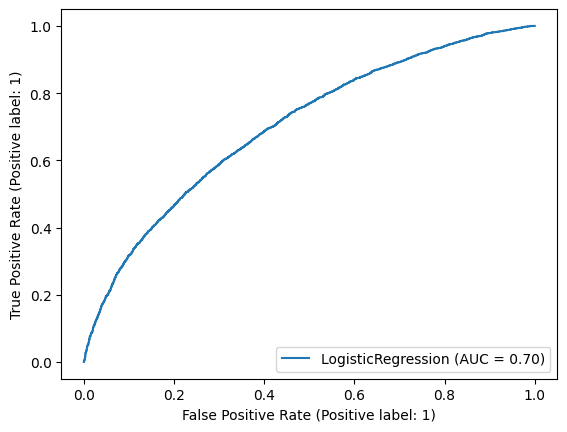

In [ ]:
metrics.RocCurveDisplay.from_estimator(logistic_reg, X_val, y_val)

# **Probit**

In [ ]:


# Add a constant to the predictor variable set
X_train_with_const = sm.add_constant(X_train)

# Fit the Probit model
probit_reg = sm.Probit(y_train, X_train_with_const).fit(max_iter = 100)

# Print the summary of the model
print(probit_reg.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 0.628618
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                52482
Model:                         Probit   Df Residuals:                    52470
Method:                           MLE   Df Model:                           11
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                 0.09310
Time:                        00:34:59   Log-Likelihood:                -32991.
converged:                       True   LL-Null:                       -36378.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8016      0.067    -26.727      0.000      -1.934      -1.670
age             1.1793    

# **Performance Metrics:**

In [ ]:
# To make predictions on a validation set, ensure it's processed identically to the training set
X_val_with_const = sm.add_constant(X_val)  # Add a constant column for the intercept

# Making predictions
y_pred_probit = probit_reg.predict(X_val_with_const)  # These are probabilities

# If you need to convert probabilities to binary outcomes based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred_probit > 0.5).astype(int)




In [ ]:
print(y_pred_probit)  # Prints the predicted probabilities


31110    0.429801
8839     0.592778
43915    0.294064
35833    0.400851
3733     0.576020
           ...   
9906     0.289135
51966    0.544347
14415    0.311449
69896    0.649306
52690    0.433068
Length: 10496, dtype: float64


In [ ]:
print(y_pred_binary)  # Prints the predicted binary outcomes

31110    0
8839     1
43915    0
35833    0
3733     1
        ..
9906     0
51966    1
14415    0
69896    1
52690    0
Length: 10496, dtype: int64


In [ ]:
# Now you can calculate the accuracy
acc_probit = metrics.accuracy_score(y_val, y_pred_binary)
print(f"Accuracy_probit: {acc_probit}")

Accuracy_probit: 0.6485327743902439


In [ ]:
# auc = metrics.roc_auc_score(y_val, probalilities[:, 1]) # probability of the class with the greater label
# print(f"Area Under ROC curve (AUC): {auc}\n")

confusion_mat_probit = metrics.confusion_matrix(y_val, y_pred_binary)
confusion_mat_probit

array([[3649, 1605],
       [2084, 3158]])

In [ ]:
tn, fp, fn, tp = confusion_mat_probit.ravel()

In [ ]:
print(f"True Negative: {tn}\n")
print(f"False Positive: {fp}\n")
print(f"False Nagative: {fn}\n")
print(f"True Positive: {tp}\n")

True Negative: 3649

False Positive: 1605

False Nagative: 2084

True Positive: 3158



In [ ]:

acc_probit = metrics.accuracy_score(y_val, y_pred_binary)
# Assuming y_val_true are the true labels and y_val_pred are the predictions from your validation set
# y_val_pred = model.predict(X_val[selected_features])

# Sensitivity (Recall) is calculated as:
sensitivity_probit = recall_score(y_val, y_pred_binary)  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_probit = confusion_mat_probit[0, 0] / (confusion_mat_probit[0, 0] + confusion_mat_probit[0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_probit = precision_score(y_val, y_pred_binary)

# Print the results
print(f'Accuracy_probit: {acc_probit:.2f}')
print(f'Sensitivity_probit (Recall): {sensitivity_probit:.2f}')
print(f'Specificity_probit: {specificity_probit:.2f}')
print(f'Precision_probit: {precision_probit:.2f}')

Accuracy_probit: 0.65
Sensitivity_probit (Recall): 0.60
Specificity_probit: 0.69
Precision_probit: 0.66


In [ ]:
X_val_with_const = sm.add_constant(X_val, has_constant='add')
y_pred_probs = probit_reg.predict(X_val_with_const)


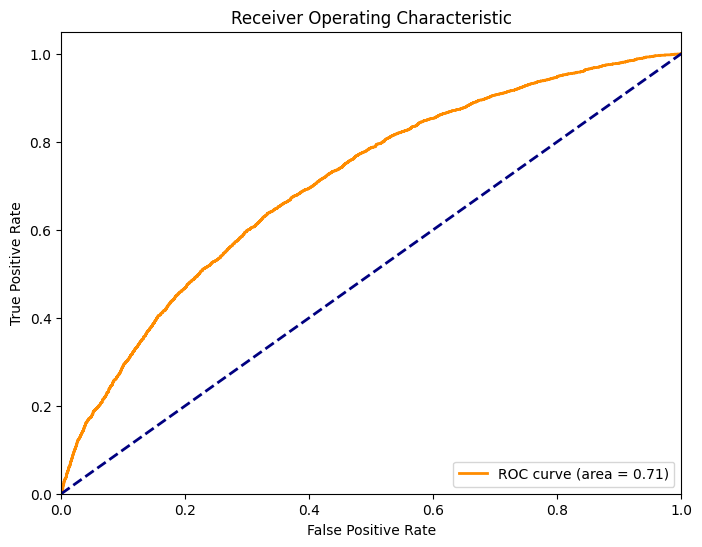

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# **Naive Bayes**

In [ ]:
# create Naive Bayes classifier
Naive_bayes_G = naive_bayes.GaussianNB()
Naive_bayes_M = naive_bayes.MultinomialNB()


In [ ]:

# fit the classifier to your training data
Naive_bayes_G.fit(X_train, y_train)
Naive_bayes_M.fit(X_train, y_train)

MultinomialNB()

**Test the prediction performance:**

In [ ]:
y_pred_G = Naive_bayes_G.predict(X_val)
print(y_pred_G)

probalilities_G = Naive_bayes_G.predict_proba(X_val)
print(f"Estiamted Probabilities_G:{probalilities_G[:10]}")



[0 0 0 ... 0 0 0]
Estiamted Probabilities_G:[[0.94167723 0.05832277]
 [0.85900181 0.14099819]
 [0.80070567 0.19929433]
 [0.93321446 0.06678554]
 [0.08036243 0.91963757]
 [0.57847164 0.42152836]
 [0.0015297  0.9984703 ]
 [0.765527   0.234473  ]
 [0.78490943 0.21509057]
 [0.49741567 0.50258433]]


In [ ]:
y_pred_M = Naive_bayes_M.predict(X_val)
print(y_pred_M)
probalilities_M = Naive_bayes_M.predict_proba(X_val)
print(f"Estiamted Probabilities_M:{probalilities_M[:10]}")

[0 0 1 ... 0 0 0]
Estiamted Probabilities_M:[[0.58355938 0.41644062]
 [0.53865488 0.46134512]
 [0.49737275 0.50262725]
 [0.56853964 0.43146036]
 [0.34497518 0.65502482]
 [0.52622372 0.47377628]
 [0.28199504 0.71800496]
 [0.52900956 0.47099044]
 [0.50248245 0.49751755]
 [0.520981   0.479019  ]]


# **Performance of GuassianNB:**

In [ ]:
 y_val == y_pred_G

17884     True
50239     True
38589    False
10077    False
17698     True
         ...  
50778     True
3419     False
1778     False
39643     True
65214    False
Name: cardio, Length: 10496, dtype: bool

In [ ]:
y_val

17884    0
50239    0
38589    1
10077    1
17698    1
        ..
50778    0
3419     0
1778     1
39643    0
65214    1
Name: cardio, Length: 10496, dtype: int64

Calculated Accuracy_NG: 0.5871760670731707

Accuracy_NG: 0.5871760670731707

Area Under ROC curve_NG (AUC): 0.6818869294709391

[[4676  599]
 [3734 1487]]


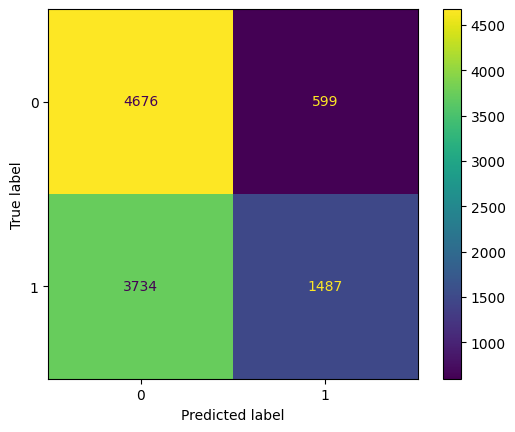

In [ ]:
# using sklearn metrics
acc_NG = (y_val  == y_pred_G).mean()
print(f"Calculated Accuracy_NG: {acc_NG}\n")
acc1_NG = metrics.accuracy_score(y_val, y_pred_G)
print(f"Accuracy_NG: {acc1_NG}\n")

auc = metrics.roc_auc_score(y_val, probalilities_G[:, 1])
print(f"Area Under ROC curve_NG (AUC): {auc}\n")

confusion_mat_NG = metrics.confusion_matrix(y_val , y_pred_G)
print(confusion_mat_NG)
metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred_G)

In [ ]:
tn, fp, fn, tp = confusion_mat_NG.ravel()

In [ ]:
print(f"True Negative_NG: {tn}\n")
print(f"False Positive_NG: {fp}\n")
print(f"False Nagative_NG: {fn}\n")
print(f"True Positive_NG: {tp}\n")

True Negative_NG: 4676

False Positive_NG: 599

False Nagative_NG: 3734

True Positive_NG: 1487



In [ ]:

acc_NG  = metrics.accuracy_score(y_val, y_pred_G )
# Assuming y_val_true are the true labels and y_val_pred are the predictions from your validation set
# y_val_pred = model.predict(X_val[selected_features])

# Sensitivity (Recall) is calculated as:
sensitivity_NG = recall_score(y_val, y_pred_G )  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_NG  = confusion_mat_NG [0, 0] / (confusion_mat_NG [0, 0] + confusion_mat_NG [0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_NG  = precision_score(y_val, y_pred_G )

# Print the results
print(f'Accuracy_NG: {acc_NG :.2f}')
print(f'Sensitivity_NG (Recall): {sensitivity_NG :.2f}')
print(f'Specificity_NG: {specificity_NG :.2f}')
print(f'Precision_NG: {precision_NG :.2f}')

Accuracy_NG: 0.59
Sensitivity_NG (Recall): 0.28
Specificity_NG: 0.89
Precision_NG: 0.71


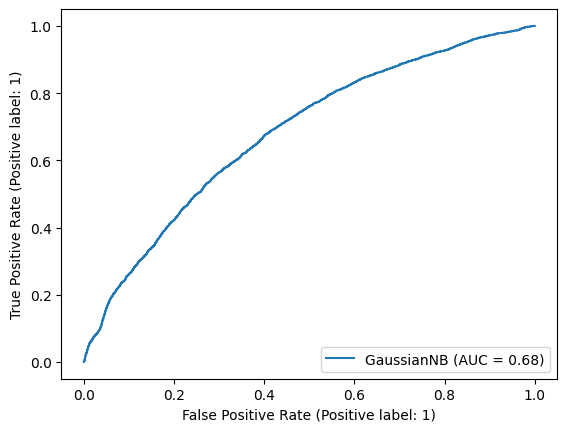

In [ ]:
metrics.RocCurveDisplay.from_estimator(Naive_bayes_G, X_val, y_val)

# **Multinomial**

In [ ]:
y_val == y_pred_M

17884     True
50239     True
38589     True
10077    False
17698     True
         ...  
50778     True
3419     False
1778     False
39643     True
65214    False
Name: cardio, Length: 10496, dtype: bool

Calculated Accuracy_NM: 0.5862233231707317

Accuracy_NM: 0.5862233231707317

Area Under ROC curve_NM (AUC): 0.6148043582651542



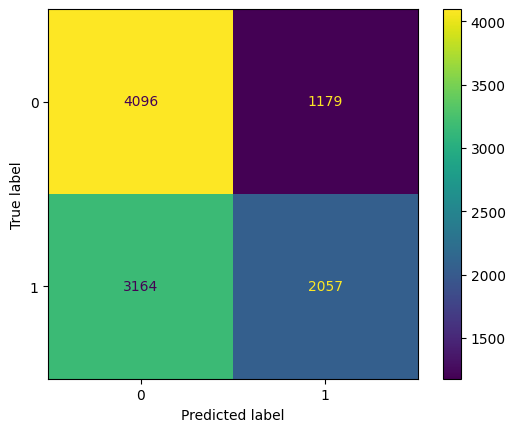

In [ ]:
# using sklearn metrics
acc_NM = (y_val == y_pred_M).mean()
print(f"Calculated Accuracy_NM: {acc_NM}\n")
acc1_NM = metrics.accuracy_score(y_val, y_pred_M)
print(f"Accuracy_NM: {acc1_NM}\n")

auc = metrics.roc_auc_score(y_val, probalilities_M[:, 1])
print(f"Area Under ROC curve_NM (AUC): {auc}\n")

confusion_mat_NM = metrics.confusion_matrix(y_val, y_pred_M)
confusion_mat_NM
metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred_M)

In [ ]:
tn, fp, fn, tp = confusion_mat_NM.ravel()

In [ ]:
print(f"True Negative_NM: {tn}\n")
print(f"False Positive_NM: {fp}\n")
print(f"False Nagative_NM: {fn}\n")
print(f"True Positive_NM: {tp}\n")

True Negative_NM: 4096

False Positive_NM: 1179

False Nagative_NM: 3164

True Positive_NM: 2057



In [ ]:

acc_NM  = metrics.accuracy_score(y_val, y_pred_M )
# Assuming y_val_true are the true labels and y_val_pred are the predictions from your validation set
# y_val_pred = model.predict(X_val[selected_features])

# Sensitivity (Recall) is calculated as:
sensitivity_NM = recall_score(y_val, y_pred_M )  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_NM  = confusion_mat_NM [0, 0] / (confusion_mat_NM [0, 0] + confusion_mat_NM [0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_NM  = precision_score(y_val, y_pred_M )

# Print the results
print(f'Accuracy_NM: {acc_NM :.2f}')
print(f'Sensitivity_NM (Recall): {sensitivity_NM :.2f}')
print(f'Specificity_NM: {specificity_NM :.2f}')
print(f'Precision_NM: {precision_NM :.2f}')

Accuracy_NM: 0.59
Sensitivity_NM (Recall): 0.39
Specificity_NM: 0.78
Precision_NM: 0.64


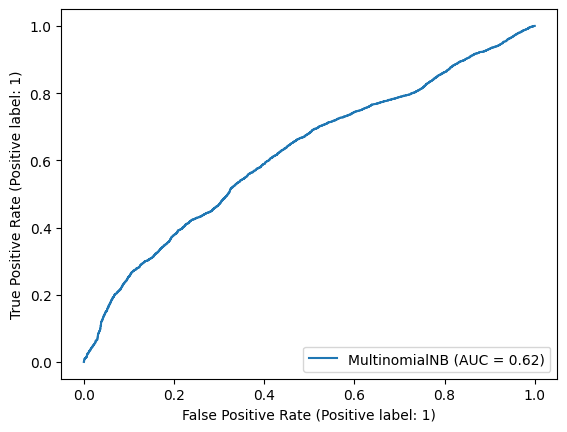

In [ ]:
metrics.RocCurveDisplay.from_estimator(Naive_bayes_M, X_val, y_val)

# **Ensamble**

In [ ]:
#Max Voting

# Alternatively, you can use “VotingClassifier” module in sklearn:
clf = VotingClassifier(estimators=[('logit', logistic_reg), ('Gaussian_G', Naive_bayes_G), ('GaussianNB()', Naive_bayes_M)], voting='hard')
clf.fit(X_val,y_val)
clf.score(X_val,y_val)
y_pred_clf = clf.predict(X_val)

Accuracy:0.6355754573170732

Area Under ROC curve (AUC):<function auc at 0x7c34f1b4be20>



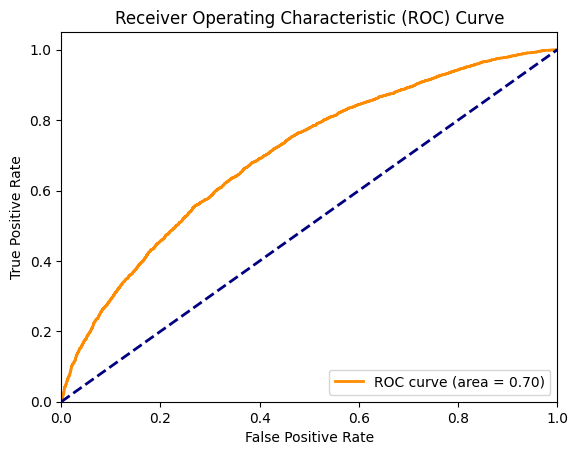

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
acc = metrics.accuracy_score(y_val, y_pred_clf)
print(f"Accuracy:{acc}\n")
AUC = metrics.roc_auc_score(y_val, probalilities[:,1])
# probability of the class with the greater label
print(f"Area Under ROC curve (AUC):{auc}\n")


# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, probalilities[:, 1])  # considering the probability of class 1

# Compute ROC area
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
acc = metrics.accuracy_score(y_val, y_pred_clf)
print(f"Accuracy:{acc}\n")
auc = metrics.roc_auc_score(y_val, probalilities[:,1])
# probability of the class with the greater label
print(f"Area Under ROC curve (AUC):{auc}\n")

Accuracy:0.6355754573170732

Area Under ROC curve (AUC):0.7004144037340998



# **Optimization**

# Original

In [ ]:
# create linear regression object
logistic_reg = linear_model.LogisticRegression(max_iter = 1000)
# fit the linear regression model to your training data
logistic_reg.fit(X_train, y_train)
print(f"intercept:{logistic_reg.intercept_}\n")
print(f"Estiamted coefficients:{logistic_reg.coef_}")

intercept:[-2.89598104]

Estiamted coefficients:[[ 1.93984969  0.07714407 -1.97763818  4.81861506  6.73015188  8.00447201
   1.21096812 -0.24382371 -0.09107519 -0.12809759 -0.18682076]]


In [ ]:
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_val)

accuracy = metrics.accuracy_score(y_val, y_pred)
precision = metrics.precision_score(y_val, y_pred)
recall = metrics.recall_score(y_val, y_pred)
f1 = metrics.f1_score(y_val, y_pred)
roc_auc = metrics.roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}\n ROC-AUC: {roc_auc}")

Accuracy: 0.6410060975609756
 Precision: 0.6567849686847599
 Recall: 0.5969639468690702
 F1 Score: 0.6254473161033798
 ROC-AUC: 0.6411915027112285


**Backward**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

Selected_Back = SequentialFeatureSelector(estimator = linear_model.LogisticRegression(max_iter = 1000), # or knn, svr, etc.
                                       n_features_to_select='auto', tol=0.05, direction='backward',
                                       scoring='r2', cv=5)
X_selected = Selected_Back.fit_transform(X_train, y_train)
print(f"selected features are: {Selected_Back.get_feature_names_out()}")

selected features are: ['age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'smoke'
 'alco' 'active']


In [ ]:
X_selected.shape

(52482, 10)

In [ ]:
X_train.shape

(52482, 11)

In [ ]:
from sklearn import metrics

# Assuming y_pred contains your model's predictions for X_val_new
# and y_val contains the actual labels
logistic_reg.fit(X_selected, y_train)
X_val_new_Back = Selected_Back.transform(X_val)
y_pred = logistic_reg.predict(X_val_new_Back)
# Calculate classification metrics
accuracy = metrics.accuracy_score(y_val, y_pred)
precision = metrics.precision_score(y_val, y_pred)
recall = metrics.recall_score(y_val, y_pred)
f1 = metrics.f1_score(y_val, y_pred)
roc_auc = metrics.roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}\n ROC-AUC: {roc_auc}")

Accuracy: 0.6403391768292683
 Precision: 0.6553731033049263
 Recall: 0.598292220113852
 F1 Score: 0.6255331812320206
 ROC-AUC: 0.6405161827702822


# **Forward**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

Selected_For = SequentialFeatureSelector(estimator = linear_model.LogisticRegression(max_iter = 1000), # or knn, svr, etc.
                                       n_features_to_select='auto', tol=0.05, direction='forward',
                                       scoring='r2', cv=5)
X_selected_2 = Selected_For.fit_transform(X_train, y_train)
print(f"selected features are: {Selected_For.get_feature_names_out()}")

selected features are: ['ap_hi']


In [ ]:
from sklearn import metrics

# Assuming y_pred contains your model's predictions for X_val_new
# and y_val contains the actual labels
logistic_reg.fit(X_selected_2, y_train)
X_val_new_For = Selected_For.transform(X_val)
y_pred = logistic_reg.predict(X_val_new_For)
# Calculate classification metrics
accuracy = metrics.accuracy_score(y_val, y_pred)
precision = metrics.precision_score(y_val, y_pred)
recall = metrics.recall_score(y_val, y_pred)
f1 = metrics.f1_score(y_val, y_pred)
roc_auc = metrics.roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy}\n Precision: {precision}\n Recall: {recall}\n F1 Score: {f1}\n ROC-AUC: {roc_auc}")


Accuracy: 0.6896913109756098
 Precision: 0.8408398239078902
 Recall: 0.47115749525616696
 F1 Score: 0.6039158457983703
 ROC-AUC: 0.6906112772874788


# **Cross Validation**

# **Logistic**

In [ ]:
# from sklearn.model_selection import cross_val_score

# # create classifier object
# logistic_reg = linear_model.LogisticRegression()
# # fit classifier with 5-fold cross-validation
# acc_scores = cross_val_score(logistic_reg, X_train, y_train, cv=5, scoring="accuracy")
# print(f"accuracies:{acc_scores}")
# print("%0.3f accuracy with a standard deviation of %0.3f" % (acc_scores.mean(), acc_scores.std()))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data then applies logistic regression
# Also, increase the max_iter parameter to give more room for the solver to converge
logistic_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit classifier with 5-fold cross-validation and calculate accuracy scores
acc_scores = cross_val_score(logistic_reg, X_train, y_train, cv=10, scoring="accuracy")

print(f"Accuracies: {acc_scores}")
print(f"{acc_scores.mean():.3f} accuracy with a standard deviation of {acc_scores.std():.3f}")


Accuracies: [0.71937512 0.72318537 0.71150915 0.72179878 0.72675305 0.71608232
 0.72351372 0.72084604 0.71989329 0.72065549]
0.720 accuracy with a standard deviation of 0.004


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data then applies logistic regression
logistic_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)
# Define the metrics you want to calculate
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'Specificity' : specificity_scorer,
    'f1': 'f1',  # Add F1 score
    'roc_auc': 'roc_auc',  # Add ROC-AUC score
}

# Fit the model with 5-fold cross-validation and calculate specified scores
scores = cross_validate(logistic_reg, X_train, y_train, cv=10, scoring=scoring, return_train_score=False)

# Print the average scores for each metric
for metric in scores.keys():
    # Since cross_validate returns a list of scores for each fold for each metric, take the mean across folds
    if metric.startswith('test_'):
        metric_name = metric[5:]  # remove 'test_' prefix to get the metric name
        print(f"{metric_name.capitalize()} Mean_score: {scores[metric].mean():.3f} (std: {scores[metric].std():.3f})")



Accuracy Mean_score: 0.720 (std: 0.004)
Precision Mean_score: 0.740 (std: 0.006)
Recall Mean_score: 0.678 (std: 0.007)
Specificity Mean_score: 0.762 (std: 0.008)
F1 Mean_score: 0.708 (std: 0.004)
Roc_auc Mean_score: 0.783 (std: 0.004)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data then applies logistic regression
logistic_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model to obtain intercept and coefficients
logistic_reg.fit(X_train, y_train)

# Access the intercept and coefficients
intercept = logistic_reg.named_steps['logisticregression'].intercept_[0]
coefficients = logistic_reg.named_steps['logisticregression'].coef_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)

# Define the metrics you want to calculate
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'Specificity' : specificity_scorer,
    'f1': 'f1',  # Add F1 score
    'roc_auc': 'roc_auc',  # Add ROC-AUC score
}

# Fit the model with 5-fold cross-validation and calculate specified scores
scores = cross_validate(logistic_reg, X_train, y_train, cv=10, scoring=scoring, return_train_score=False)

# Print the average scores for each metric
for metric in scores.keys():
    # Since cross_validate returns a list of scores for each fold for each metric, take the mean across folds
    if metric.startswith('test_'):
        metric_name = metric[5:]  # remove 'test_' prefix to get the metric name
        print(f"{metric_name.capitalize()} Mean_score: {scores[metric].mean():.3f} (std: {scores[metric].std():.3f})")


Intercept: 0.10681488367118833
Coefficients: [ 0.37115814  0.00723063 -0.06390542  0.23619829  6.01559637  0.07255872
  0.36091857 -0.07095578 -0.04598705 -0.03716339 -0.08342455]
Accuracy Mean_score: 0.720 (std: 0.004)
Precision Mean_score: 0.740 (std: 0.006)
Recall Mean_score: 0.678 (std: 0.007)
Specificity Mean_score: 0.762 (std: 0.008)
F1 Mean_score: 0.708 (std: 0.004)
Roc_auc Mean_score: 0.783 (std: 0.004)


In [ ]:
# Get the feature names from X_train
feature_names = X_train.columns

# Print coefficients along with their corresponding variable names
for feature_name, coefficient in zip(feature_names, coefficients):
    print(f"{feature_name}: {coefficient:.4f}")


age: 0.3712
gender: 0.0072
height: -0.0639
weight: 0.2362
ap_hi: 6.0156
ap_lo: 0.0726
cholesterol: 0.3609
gluc: -0.0710
smoke: -0.0460
alco: -0.0372
active: -0.0834


In [ ]:
import statsmodels.api as sm

# Fit logistic regression model with statsmodels
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Get p-values for coefficients
p_values = result.pvalues[1:]  # Exclude intercept

# Print p-values for each feature
for feature_name, p_value in zip(feature_names, p_values):
    print(f"{feature_name}: p-value = {p_value:.4f}")

Optimization terminated successfully.
         Current function value: 0.595811
         Iterations 8
age: p-value = 0.0000
gender: p-value = 0.5542
height: p-value = 0.0000
weight: p-value = 0.0000
ap_hi: p-value = 0.0000
ap_lo: p-value = 0.0000
cholesterol: p-value = 0.0000
gluc: p-value = 0.0000
smoke: p-value = 0.0000
alco: p-value = 0.0004
active: p-value = 0.0000


# **Implement Test**

In [ ]:
cv_results = cross_validate(logistic_reg, X_train, y_train, cv=10, scoring=scoring, return_estimator=True)

# Access the trained model from cross-validation results (e.g., using the first fold)
trained_model = cv_results['estimator'][0]

# Apply the trained model on the new dataset to make predictions
y_pred_test = trained_model.predict(X_test)

# Print the predicted labels
print("Predicted labels:", y_pred_test)

Predicted labels: [1 0 0 ... 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Print the evaluation metrics for test data
print("Test Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC AUC Score: {roc_auc_test:.4f}")


Test Data Metrics:
Accuracy: 0.7181
Precision: 0.7503
Recall: 0.6707
F1 Score: 0.7083
ROC AUC Score: 0.7191


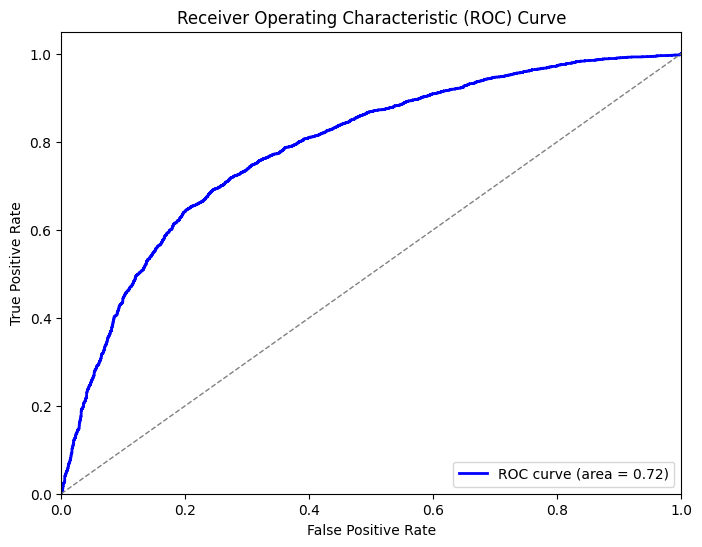

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the probabilities for class 1 (positive class) for the test data
y_prob_test = trained_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


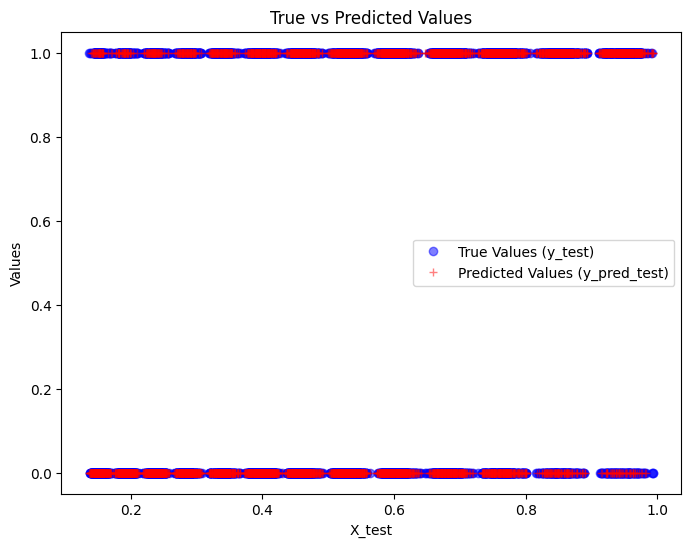

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot y_test
ax.plot(X_test.age, y_test, 'bo', label='True Values (y_test)', alpha=0.5)

# Plot y_pred_test
ax.plot(X_test.age, y_pred_test, 'r+', label='Predicted Values (y_pred_test)', alpha=0.5)

# Set labels and title
ax.set_xlabel('X_test')
ax.set_ylabel('Values')
ax.set_title('True vs Predicted Values')
ax.legend()

plt.show()



In [ ]:
import numpy as np

# Assuming 'coefficients' are the coefficients from your logistic regression model
odds_ratios = np.exp(coefficients)

# Get the feature names from X_train
feature_names = X_train.columns

# Print odds ratios along with their corresponding variable names
print("Odds Ratios:")
for feature_name, odds_ratio in zip(feature_names, odds_ratios):
    print(f"{feature_name}: Odds Ratio = {odds_ratio:.4f}")

Odds Ratios:
age: Odds Ratio = 1.4494
gender: Odds Ratio = 1.0073
height: Odds Ratio = 0.9381
weight: Odds Ratio = 1.2664
ap_hi: Odds Ratio = 409.7701
ap_lo: Odds Ratio = 1.0753
cholesterol: Odds Ratio = 1.4346
gluc: Odds Ratio = 0.9315
smoke: Odds Ratio = 0.9551
alco: Odds Ratio = 0.9635
active: Odds Ratio = 0.9200


### **Probit**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
import numpy as np
def calculate_specificity(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    specificity_score = tn / (tn + fp)
    return specificity_score

def cross_validate_probit_metrics(X, y, cv=10):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores_dict = {  # Renamed to avoid conflict
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'specificity': []

    }

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        X_train_scaled_const = sm.add_constant(X_train_scaled)
        X_val_scaled_const = sm.add_constant(X_val_scaled)

        model = sm.Probit(y_train, X_train_scaled_const).fit(disp=0)
        prediction_probs = model.predict(X_val_scaled_const)
        predictions = (prediction_probs >= 0.5).astype(int)

        scores_dict['accuracy'].append(accuracy_score(y_val, predictions))
        scores_dict['precision'].append(precision_score(y_val, predictions, zero_division=1))
        scores_dict['recall'].append(recall_score(y_val, predictions))
        scores_dict['f1'].append(f1_score(y_val, predictions, zero_division=1))
        scores_dict['specificity'].append(calculate_specificity(y_val, predictions))


    for metric_name, score_values in scores_dict.items():
        print(f"{metric_name.capitalize()} Mean Score: {np.mean(score_values):.3f} (std: {np.std(score_values):.3f})")

# Assuming X_train and y_train are pandas DataFrame and Series respectively
cross_validate_probit_metrics(X_train, y_train, cv=10)


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2875: RuntimeWarning: invalid value encountered in divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)


Accuracy Mean Score: 0.620 (std: 0.059)
Precision Mean Score: 0.730 (std: 0.135)
Recall Mean Score: 0.488 (std: 0.244)
F1 Mean Score: 0.508 (std: 0.254)
Specificity Mean Score: 0.751 (std: 0.125)


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2875: RuntimeWarning: invalid value encountered in divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)


# **Naive**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X and y are your features and target variables
# Splitting dataset for demonstration; you might use the entire dataset for cross-validation

# Define the models
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB()
}

# Define scoring metrics
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity




scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'specificity': make_scorer(specificity_score)
}

# Perform cross-validation and print results
for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)
    print(f"Results for {name}:")
    for metric in scores:
        if metric.startswith('test_'):
            metric_name = metric.replace('test_', '')
            average_score = np.mean(scores[metric])
            print(f"{metric_name}: {average_score:.4f}")
    print("\n")



Results for GaussianNB:
accuracy: 0.5978
precision: 0.7196
recall: 0.3208
f1: 0.4436
roc_auc: 0.6930
specificity: 0.8749


Results for MultinomialNB:
accuracy: 0.5944
precision: 0.6500
recall: 0.4095
f1: 0.5024
roc_auc: 0.6284
specificity: 0.7795




# **Ignore insignificance variable**

In [ ]:
Df.drop("gender", inplace=True, axis=1)

<ipython-input-75-bb3a47c4c302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.drop("gender", inplace=True, axis=1)


In [ ]:
# Selecting the columns to normalize
columns_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo' , 'cholesterol','gluc' , 'smoke', 'alco', 'active']


Df_Normalized = Df.copy()

# Initializing the MinMaxScaler
scaler = MinMaxScaler()


# Display the first few rows of the DataFrame after normalization
#Df[columns_to_normalize] = scaler.fit_transform(Df[columns_to_normalize])
Df_Normalized.loc[:, columns_to_normalize] = scaler.fit_transform(Df_Normalized[columns_to_normalize])

<ipython-input-76-cfa832275621>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Df_Normalized.loc[:, columns_to_normalize] = scaler.fit_transform(Df_Normalized[columns_to_normalize])


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data then applies logistic regression
logistic_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model to obtain intercept and coefficients
logistic_reg.fit(X_train, y_train)

# Access the intercept and coefficients
intercept = logistic_reg.named_steps['logisticregression'].intercept_[0]
coefficients = logistic_reg.named_steps['logisticregression'].coef_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)

# Define the metrics you want to calculate
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'Specificity' : specificity_scorer,
    'f1': 'f1',  # Add F1 score
    'roc_auc': 'roc_auc',  # Add ROC-AUC score
}

# Fit the model with 5-fold cross-validation and calculate specified scores
scores = cross_validate(logistic_reg, X_train, y_train, cv=10, scoring=scoring, return_train_score=False)

# Print the average scores for each metric
for metric in scores.keys():
    # Since cross_validate returns a list of scores for each fold for each metric, take the mean across folds
    if metric.startswith('test_'):
        metric_name = metric[5:]  # remove 'test_' prefix to get the metric name
        print(f"{metric_name.capitalize()} Mean_score: {scores[metric].mean():.3f} (std: {scores[metric].std():.3f})")


Intercept: 0.10045380730335131
Coefficients: [ 0.37022618  0.02100662 -0.06681176  0.24258531  5.3538468   0.08352667
  0.35053122 -0.05686942 -0.03667704 -0.03712875 -0.07339439]
Accuracy Mean_score: 0.719 (std: 0.005)
Precision Mean_score: 0.738 (std: 0.009)
Recall Mean_score: 0.679 (std: 0.005)
Specificity Mean_score: 0.758 (std: 0.011)
F1 Mean_score: 0.707 (std: 0.004)
Roc_auc Mean_score: 0.782 (std: 0.007)


In [ ]:
cv_results = cross_validate(logistic_reg, X_train, y_train, cv=10, scoring=scoring, return_estimator=True)

# Access the trained model from cross-validation results (e.g., using the first fold)
trained_model = cv_results['estimator'][0]

# Apply the trained model on the new dataset to make predictions
y_pred_test = trained_model.predict(X_test)

# Print the predicted labels
print("Predicted labels:", y_pred_test)

Predicted labels: [1 0 0 ... 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test and y_pred_test are defined
# Calculate evaluation metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
specificity_test = tn / (tn + fp)

# Print the evaluation metrics for test data
print("Test Data Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC AUC Score: {roc_auc_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")


Test Data Metrics:
Accuracy: 0.7189
Precision: 0.7359
Recall: 0.6773
F1 Score: 0.7054
ROC AUC Score: 0.7187
Specificity: 0.7600


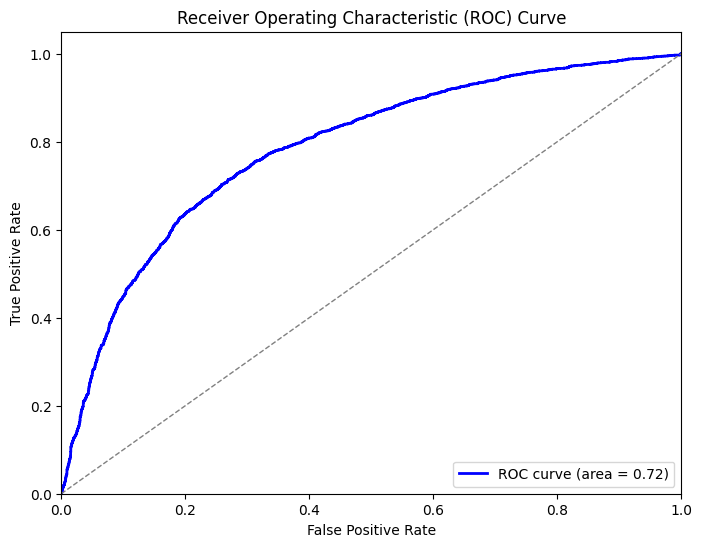

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the probabilities for class 1 (positive class) for the test data
y_prob_test = trained_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Get the feature names from X_train
feature_names = X_train.columns

# Print coefficients along with their corresponding variable names
for feature_name, coefficient in zip(feature_names, coefficients):
    print(f"{feature_name}: {coefficient:.4f}")

age: 0.3766
height: -0.0448
weight: 0.2256
ap_hi: 6.2180
ap_lo: 0.0583
cholesterol: 0.3554
gluc: -0.0561
smoke: -0.0228
alco: -0.0407
active: -0.0767


In [ ]:
import numpy as np

# Assuming 'coefficients' are the coefficients from your logistic regression model
odds_ratios = np.exp(coefficients)

# Get the feature names from X_train
feature_names = X_train.columns

# Print odds ratios along with their corresponding variable names
print("Odds Ratios:")
for feature_name, odds_ratio in zip(feature_names, odds_ratios):
    print(f"{feature_name}: Odds Ratio = {odds_ratio:.4f}")


Odds Ratios:
age: Odds Ratio = 1.4573
height: Odds Ratio = 0.9562
weight: Odds Ratio = 1.2531
ap_hi: Odds Ratio = 501.6830
ap_lo: Odds Ratio = 1.0601
cholesterol: Odds Ratio = 1.4268
gluc: Odds Ratio = 0.9454
smoke: Odds Ratio = 0.9775
alco: Odds Ratio = 0.9601
active: Odds Ratio = 0.9262
